In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [7]:
import matplotlib.pyplot as plt
plt.rc('font' , family='NanumBarunGothic')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np

In [10]:
import os
#경로문자열을 더할때 사용함
dataPath='/content/drive/MyDrive/'  #data의 기본이 되는 경로
csvPath1=os.path.join(dataPath, 'seoul.csv')
csvPath2=os.path.join(dataPath, 'seoul2.csv')
csvPath3=os.path.join(dataPath,'seoul3.csv')

In [ ]:
df1=pd.read_csv(csvPath1, encoding='cp949')
df2=pd.read_csv(csvPath2, encoding='cp949')
df3=pd.read_csv(csvPath3, encoding='cp949')

In [12]:
df1.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [13]:
df2.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,2018-03-29,15.4,11.8,21.1
1,108,서울,2018-03-30,14.8,9.8,21.9
2,108,서울,2018-03-31,14.0,9.3,20.1
3,108,서울,2018-04-01,15.6,11.7,18.5
4,108,서울,2018-04-02,18.4,14.9,23.7


In [14]:
df1.columns=['일시', '지점', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)']
df1['지점명']='서울'

In [15]:
df2.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)'], dtype='object')

In [16]:
df1=df1[['지점','지점명','일시','평균기온(°C)', '최저기온(°C)', '최고기온(°C)']] #무슨논리? 불러주는 논리

In [17]:
df1.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907-10-01,13.5,7.9,20.7
1,108,서울,1907-10-02,16.2,7.9,22.0
2,108,서울,1907-10-03,16.2,13.1,21.3
3,108,서울,1907-10-04,16.5,11.2,22.0
4,108,서울,1907-10-05,17.6,10.9,25.4


In [18]:
df=pd.concat([df1,df2,df3])

In [19]:
df.head(70)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907-10-01,13.5,7.9,20.7
1,108,서울,1907-10-02,16.2,7.9,22.0
2,108,서울,1907-10-03,16.2,13.1,21.3
3,108,서울,1907-10-04,16.5,11.2,22.0
4,108,서울,1907-10-05,17.6,10.9,25.4
...,...,...,...,...,...,...
65,108,서울,1907-12-05,-1.0,-6.9,2.6
66,108,서울,1907-12-06,-1.3,-6.1,5.8
67,108,서울,1907-12-07,-4.1,-9.3,1.9
68,108,서울,1907-12-08,-1.1,-7.2,6.6


In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
42250,108,서울,2024-08-07,29.6,27.2,33.4
42251,108,서울,2024-08-08,28.5,26.9,31.6
42252,108,서울,2024-08-09,29.3,25.6,33.6
42253,108,서울,2024-08-10,30.0,26.4,33.6
42254,108,서울,2024-08-11,30.8,27.8,34.4


In [22]:
# 1.결측치 있는 기간파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42255 entries, 0 to 42254
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        42255 non-null  int64  
 1   지점명       42255 non-null  object 
 2   일시        42255 non-null  object 
 3   평균기온(°C)  41499 non-null  float64
 4   최저기온(°C)  41497 non-null  float64
 5   최고기온(°C)  41497 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.9+ MB


In [23]:
# 데이터 프레임에서 결측치가 있는 인덱스를 파악하고 싶을때
df[df.isnull().any(axis=1)].index.to_list() #any의 활용에 익숙해져야함!

[15676,
 15677,
 15678,
 15679,
 15680,
 15681,
 15682,
 15683,
 15684,
 15685,
 15686,
 15687,
 15688,
 15689,
 15690,
 15691,
 15692,
 15693,
 15694,
 15695,
 15696,
 15697,
 15698,
 15699,
 15700,
 15701,
 15702,
 15703,
 15704,
 15705,
 15706,
 15707,
 15708,
 15709,
 15710,
 15711,
 15712,
 15713,
 15714,
 15715,
 15716,
 15717,
 15718,
 15719,
 15720,
 15721,
 15722,
 15723,
 15724,
 15725,
 15726,
 15727,
 15728,
 15729,
 15730,
 15731,
 15732,
 15733,
 15734,
 15735,
 15736,
 15737,
 15738,
 15739,
 15740,
 15741,
 15742,
 15743,
 15744,
 15745,
 15746,
 15747,
 15748,
 15749,
 15750,
 15751,
 15752,
 15753,
 15754,
 15755,
 15756,
 15757,
 15758,
 15759,
 15760,
 15761,
 15762,
 15763,
 15764,
 15765,
 15766,
 15767,
 15768,
 15769,
 15770,
 15771,
 15772,
 15773,
 15774,
 15775,
 15776,
 15777,
 15778,
 15779,
 15780,
 15781,
 15782,
 15783,
 15784,
 15785,
 15786,
 15787,
 15788,
 15789,
 15790,
 15791,
 15792,
 15793,
 15794,
 15795,
 15796,
 15797,
 15798,
 15799,
 15800,


In [24]:
newdf=df.copy()

In [25]:
newdf.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907-10-01,13.5,7.9,20.7
1,108,서울,1907-10-02,16.2,7.9,22.0
2,108,서울,1907-10-03,16.2,13.1,21.3
3,108,서울,1907-10-04,16.5,11.2,22.0
4,108,서울,1907-10-05,17.6,10.9,25.4


In [26]:
newdf['일시']=pd.to_datetime(newdf['일시'])

In [27]:
newdf['년도']=newdf['일시'].dt.year

In [28]:
newdf['일']=newdf['일시'].dt.day

In [29]:
newdf['월']=newdf['일시'].dt.month

In [30]:
newdf.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),년도,일,월
0,108,서울,1907-10-01,13.5,7.9,20.7,1907,1,10
1,108,서울,1907-10-02,16.2,7.9,22.0,1907,2,10
2,108,서울,1907-10-03,16.2,13.1,21.3,1907,3,10
3,108,서울,1907-10-04,16.5,11.2,22.0,1907,4,10
4,108,서울,1907-10-05,17.6,10.9,25.4,1907,5,10


In [31]:
df['지점명'][::-1]

,지점명
42254,서울
42253,서울
42252,서울
42251,서울
42250,서울
...,...
4,서울
3,서울
2,서울
1,서울


In [32]:
# 데이터 전처리시에 가장 먼저 할 것은 결측치를 다루는 일이다.

In [33]:
# year, month, day 칼럼 나눠서 만들면 후에 인덱싱하기 편함
# 결측치 데이터 채우는 법 #fillna 사용?

# 기상청 여름 겨울 기준 사용
# 칼럼 쪼개기

In [34]:
# 시계열 주기가 다른 데이터를 합칠 때 어떻게 다룰것인지?

In [35]:
df.set_index('일시').loc['1950-09-01',:]

,1950-09-01
지점,108
지점명,서울
평균기온(°C),NaN
최저기온(°C),NaN
최고기온(°C),NaN


In [36]:
# isnull로 식별되지 않는 빈값 빈문자열 식별하기
df[(df['평균기온(°C)']==str)] #? 빈문자열이 아닌가

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)


In [37]:
# 그럼 ...으로 표현되어있으니까 인덱스가 끊어졌을때를 인식해서 기간을 뽑아내고 싶다면? 이것도 굳이 한다면 인덱스 리스트 불러와서 for문밖에 없을듯
# for문돌리는건 비효율적으로보이는데 O(N)

df.dropna(how='any',inplace=True)

In [38]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42255 entries, 0 to 42254
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   지점        42255 non-null  int64         
 1   지점명       42255 non-null  object        
 2   일시        42255 non-null  datetime64[ns]
 3   평균기온(°C)  41499 non-null  float64       
 4   최저기온(°C)  41497 non-null  float64       
 5   최고기온(°C)  41497 non-null  float64       
 6   년도        42255 non-null  int32         
 7   일         42255 non-null  int32         
 8   월         42255 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(1)
memory usage: 2.4+ MB


In [39]:
nulllist=newdf[newdf.isnull().any(axis=1)]['일시'] # any차이

In [40]:
newdf[newdf.isnull().any(axis=1)]['일시']

,일시
15676,1950-09-01
15677,1950-09-02
15678,1950-09-03
15679,1950-09-04
15680,1950-09-05
...,...
16430,1953-11-29
16431,1953-11-30
21260,1967-02-19
39758,2017-10-12


In [41]:
newdf[newdf['평균기온(°C)'].isnull()]['일시'] #3개 적은 것은 평균기온이 아니라 최고 최저에 null 값 3개 , 그래도 any의 활용을 언제해야하는지

,일시
15676,1950-09-01
15677,1950-09-02
15678,1950-09-03
15679,1950-09-04
15680,1950-09-05
...,...
16427,1953-11-26
16428,1953-11-27
16429,1953-11-28
16430,1953-11-29


In [42]:
nulllist=newdf[newdf.isnull().any(axis=1)]['일시']
diff2=nulllist.index.diff()

print(nulllist.iloc[0])
for i in range(1, len(nulllist)):
  if diff2[i] != 1:
    print(nulllist.iloc[i-1], nulllist.iloc[i])

1950-09-01 00:00:00
1953-11-30 00:00:00 1967-02-19 00:00:00
1967-02-19 00:00:00 2017-10-12 00:00:00
2017-10-12 00:00:00 2022-08-08 00:00:00


In [43]:
nulllist=newdf[newdf.isnull().any(axis=1)]['일시']
diff = nulllist.diff()#.fillna(pd.Timedelta(days=1))
print(nulllist.iloc[0])
for i in range(1, len(nulllist)):
  if diff.iloc[i] != pd.Timedelta(days=1):
    print(i,nulllist.iloc[i-1], nulllist.iloc[i]) #날짜 null

1950-09-01 00:00:00
25 1950-09-25 00:00:00 1950-10-01 00:00:00
56 1950-10-31 00:00:00 1951-12-01 00:00:00
300 1952-07-31 00:00:00 1952-09-01 00:00:00
756 1953-11-30 00:00:00 1967-02-19 00:00:00
757 1967-02-19 00:00:00 2017-10-12 00:00:00
758 2017-10-12 00:00:00 2022-08-08 00:00:00


In [45]:
li=[1,2,3,4]
li2=pd.DataFrame(li)
diff=li2.diff()

diff

,0
0,NaN
1,1.0
2,1.0
3,1.0


In [46]:
nulllist.loc[39755:39760.:] #nulllist[a:b] 이런식으로 인덱싱 못하나

,일시
39758,2017-10-12


In [ ]:
diff[diff!=pd.Timedelta(days=1)] #diff 계산이 이상한데

,일시
15701,6 days
15732,396 days
15976,32 days
21260,4829 days
39758,18498 days
41519,1761 days


In [ ]:
newdf[(newdf['년도']==1950) & (newdf['월']==10)]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),년도,월,일
15701,108,서울,1950-10-01,NaN,NaN,NaN,1950,10,1
15702,108,서울,1950-10-02,NaN,NaN,NaN,1950,10,2
15703,108,서울,1950-10-03,NaN,NaN,NaN,1950,10,3
15704,108,서울,1950-10-04,NaN,NaN,NaN,1950,10,4
15705,108,서울,1950-10-05,NaN,NaN,NaN,1950,10,5
15706,108,서울,1950-10-06,NaN,NaN,NaN,1950,10,6
15707,108,서울,1950-10-07,NaN,NaN,NaN,1950,10,7
15708,108,서울,1950-10-08,NaN,NaN,NaN,1950,10,8
15709,108,서울,1950-10-09,NaN,NaN,NaN,1950,10,9
15710,108,서울,1950-10-10,NaN,NaN,NaN,1950,10,10


In [ ]:
diff.iloc[24]

Timedelta('1 days 00:00:00')

In [ ]:
print(nulllist)

15676   1950-09-01
15677   1950-09-02
15678   1950-09-03
15679   1950-09-04
15680   1950-09-05
           ...    
16430   1953-11-29
16431   1953-11-30
21260   1967-02-19
39758   2017-10-12
41519   2022-08-08
Name: 일시, Length: 759, dtype: datetime64[ns]


In [47]:
# 1907~2024년간 평균기온이 상승하는가? 얼마나 상승하는가?
# 그냥 단순하게는 100개씩 끊어서 sum을 구해도 되겠지
# 총 년도에 해당하는 인덱스 개수를 알아야함.

dic={}
for i in range(1907,2025):
  if len(df.loc[df['일시'].str[:4]==str(i),'평균기온(°C)'])!=0:
    dic[i]=((df.loc[df['일시'].str[:4]==str(i),'평균기온(°C)'].sum())/len(df.loc[df['일시'].str[:4]==str(i),'평균기온(°C)'])).round(1)    ## pandas에서 문자열에 접근하는 법

In [48]:
dff=pd.DataFrame(dic.items(), columns=['년도','평균기온'])
dff.head() #1907년은 1년 전체의 평균온도가 아님

,년도,평균기온
0,1907,5.1
1,1908,10.4
2,1909,10.6
3,1910,10.4
4,1911,10.7


In [49]:
dff.drop(index=[0],inplace=True)

In [50]:
dff.head()

,년도,평균기온
1,1908,10.4
2,1909,10.6
3,1910,10.4
4,1911,10.7
5,1912,10.1


In [51]:
dff.set_index('년도', inplace=True)

In [52]:
dff.head()

,평균기온
년도,
1908,10.4
1909,10.6
1910,10.4
1911,10.7
1912,10.1


In [53]:
dff.drop(index=[1950,1953],axis=0,inplace=True) #axis=0 이나 1이나 같은데?

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 1908 to 2024
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균기온    113 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [54]:
li1=list(dff.index)
print(li1)

[1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


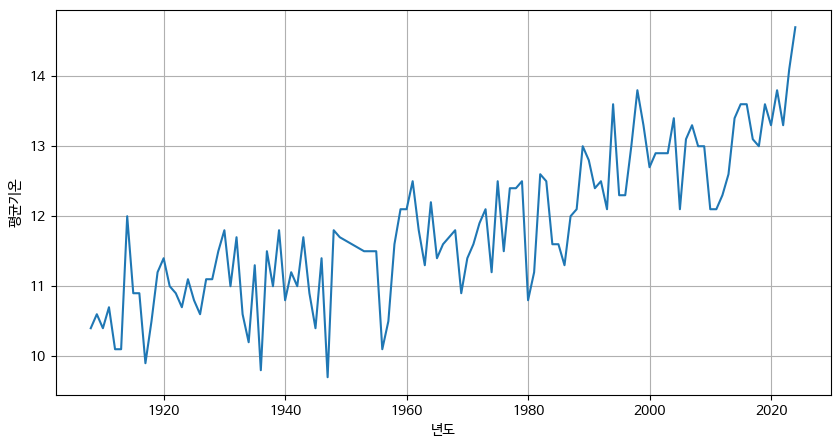

In [59]:
plt.figure(figsize=(10,5))  #그래프 선형보간 50~53 50515253

plt.plot(dff.index, dff['평균기온'])
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.grid()
plt.show()

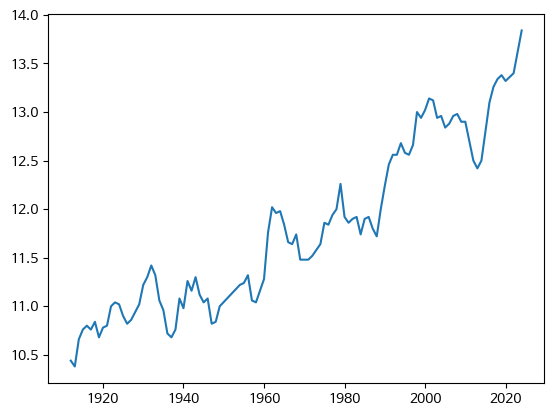

In [56]:
#이동평균

dff['5년이동평균기온'] = dff['평균기온'].rolling(5).mean()
plt.plot(dff.index,dff['5년이동평균기온'])

In [ ]:
dff.loc[1951].values[0]

11.599999999999998

In [58]:
dff.sort_index(ascending=True,inplace=True) #이게 왜 필요하지 어차피 년도에 따라서 점 찍는거아닌가?

In [57]:
#50~53 선형보간
temp=(dff.loc[1955]-dff.loc[1949])/4
for i in range(1950,1954):
  dff.loc[i]=dff.loc[i-1].values[0]+temp

In [ ]:
# 가능하다면 그래프로 표현해봐 20년단위로

In [ ]:
# ~2024년간 겨울의 최저기온, 여름의 최고기온은 언제인가?
# 24 57 810 11 1

In [60]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907-10-01,13.5,7.9,20.7
1,108,서울,1907-10-02,16.2,7.9,22.0
2,108,서울,1907-10-03,16.2,13.1,21.3
3,108,서울,1907-10-04,16.5,11.2,22.0
4,108,서울,1907-10-05,17.6,10.9,25.4


In [61]:
df.tail() #여름은 1908~2023 겨울 1907~2023

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
42250,108,서울,2024-08-07,29.6,27.2,33.4
42251,108,서울,2024-08-08,28.5,26.9,31.6
42252,108,서울,2024-08-09,29.3,25.6,33.6
42253,108,서울,2024-08-10,30.0,26.4,33.6
42254,108,서울,2024-08-11,30.8,27.8,34.4


In [65]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907-10-01,13.5,7.9,20.7
1,108,서울,1907-10-02,16.2,7.9,22.0
2,108,서울,1907-10-03,16.2,13.1,21.3
3,108,서울,1907-10-04,16.5,11.2,22.0
4,108,서울,1907-10-05,17.6,10.9,25.4


In [62]:
tempp= df['일시'].str[5:7]
df2=df[((tempp=='05') | (tempp=='06') | (tempp=='07'))] #df2 = df[tempp.isin(['05', '06', '07'])]

before=0
for i in range(1908,2024):
  a=((df2.loc[df2['일시'].str[:4]==str(i),'평균기온(°C)'].sum())/len(df2.loc[df2['일시'].str[:4]==str(i),'평균기온(°C)'])).round(1)
  if a > before:
    before=a
    year=i

print(f'{year}년에 여름 최고기온 {before}도')

<ipython-input-62-ef3ac161cbe9>:6: RuntimeWarning: invalid value encountered in scalar divide
  a=((df2.loc[df2['일시'].str[:4]==str(i),'평균기온(°C)'].sum())/len(df2.loc[df2['일시'].str[:4]==str(i),'평균기온(°C)'])).round(1)


2022년에 여름 최고기온 23.3도


In [ ]:
a=(df2.loc[df2['일시'].str[:4]=='1908','평균기온(°C)'].sum())/len(df2.loc[df2['일시'].str[:4]=='1908','평균기온(°C)'])

print(a)

19.678260869565218


In [88]:
tempp= df['일시'].str[5:7]
df3=df[((tempp=='11') | (tempp=='12') | (tempp=='01'))]

before=50
for i in range(1907,2024):
  long=df3.loc[((df3['일시'].str[:4]==str(i))&(df3['일시'].str[5:7]=='11'))|((df3['일시'].str[:4]==str(i))&(df3['일시'].str[5:7]=='12')),'평균기온(°C)']
  a=(long.sum())
  a+=df3.loc[(df3['일시'].str[:4]==str(i+1))&(df3['일시'].str[5:7]=='01'),'평균기온(°C)'].sum()
  a= a/(len(long)+len(df3.loc[(df3['일시'].str[:4]==str(i+1))&(df3['일시'].str[5:7]=='01')]))
  if a < before:
    before=a
    year=i

before=before.round(1)

print(f'{year}년에 겨울 최저기온 {before}도')

<ipython-input-88-b3bd81e2b412>:9: RuntimeWarning: invalid value encountered in scalar divide
  a= a/(len(long)+len(df3.loc[(df3['일시'].str[:4]==str(i+1))&(df3['일시'].str[5:7]=='01')]))


1917년에 겨울 최저기온 -3.4도


In [ ]:
# 왜 이걸 몰랐을까 평균 내는 타이밍에 따라 값이 바뀌네

In [74]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907-10-01,13.5,7.9,20.7
1,108,서울,1907-10-02,16.2,7.9,22.0
2,108,서울,1907-10-03,16.2,13.1,21.3
3,108,서울,1907-10-04,16.5,11.2,22.0
4,108,서울,1907-10-05,17.6,10.9,25.4


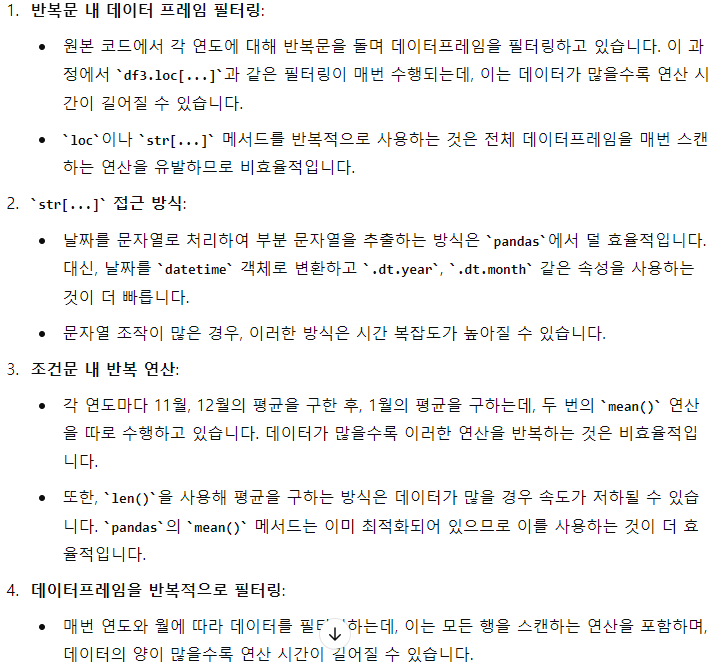

In [83]:
# 시간복잡도 효율성
tempp= df['일시'].str[5:7]
df3 = df[tempp.isin(['11', '12', '01'])] # isin 활용

df3['임시연도'] = df3['일시'].apply(lambda x: x[:4] if x[5:7] != '01' else str(int(x[:4]) -1))
# 임시연도 생성하는 아이디어 / 이미 고효율의 방법을 사용하기위해 데이터를 적당히 가공 / gropuby할 수 있게

grouped = df3.groupby('임시연도')['평균기온(°C)'].mean()

year = grouped.idxmin() # pandas에서 이미 효율적으로 구현된 연산 사용
min_temp = grouped.min()

min_temp = round(min_temp, 2)
print(f'{year}년에 겨울 최저기온 {min_temp}도')

1917년에 겨울 최저기온 -3.4도


<ipython-input-83-3ae5265f4fbd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['임시연도'] = df3['일시'].apply(lambda x: x[:4] if x[5:7] != '01' else str(int(x[:4]) -1))


In [ ]:
'321'<'322' # 숫자 string은 비교가능

True

In [ ]:
import datetime as dt
x=dt.datetime.now()
print(x)
x.year, x.hour, x.day, x.month, x.minute, x.weekday()

2024-08-13 05:05:22.877478


(2024, 5, 13, 8, 5, 1)